In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [4]:
data_path = '/home/achara/data/achara/'
df = pd.read_csv(data_path + 'pc_data_2017_to_2019.csv')

In [5]:
df.head()

,DateTime,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,...,day,year,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP
0,10/1/2017,1.01,0.1556,0.358058,9.17,101.610000,139.810000,20.380000,8.010344,0.880,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
1,10/1/2017,1.03,0.1520,0.544445,9.18,101.776667,139.786667,20.386667,8.027139,0.862,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
2,10/1/2017,1.05,0.1304,0.843708,9.16,101.230000,139.660000,20.220000,8.019958,0.844,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
3,10/1/2017,1.07,0.1592,0.939807,9.16,101.590000,139.780000,20.410000,8.038803,0.826,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
4,10/1/2017,1.09,0.1340,0.797623,9.15,101.490000,139.750000,20.420000,8.024188,0.835,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741


In [6]:
lst = pd.read_csv(data_path+'LST.csv')

In [7]:
lst.head()

,YEAR,MO,DY,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN
0,2017,11,1,4.30,1.41,301.89
1,2017,11,2,10.96,1.07,343.94
2,2017,11,3,2.05,1.01,317.38
3,2017,11,4,0.01,2.65,264.45
4,2017,11,5,5.74,0.87,322.28


In [8]:
lst.rename(columns={'YEAR':'year', 'MO':'month','DY':'day'}, inplace=True)

In [9]:
lst.head()

,year,month,day,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN
0,2017,11,1,4.30,1.41,301.89
1,2017,11,2,10.96,1.07,343.94
2,2017,11,3,2.05,1.01,317.38
3,2017,11,4,0.01,2.65,264.45
4,2017,11,5,5.74,0.87,322.28


In [10]:
merged = df.merge(lst, on=['year','month','day'], how='left')

In [11]:
mean_df = merged.groupby(['month']).mean(['PRECTOTCORR', 'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_SW_DWN'])

In [12]:
merged['PRECTOTCORR'] = merged['PRECTOTCORR'].fillna(
    merged.month.map(lambda m: mean_df.at[m, 'PRECTOTCORR']))

In [12]:
merged['ALLSKY_SFC_LW_DWN'] = merged['ALLSKY_SFC_LW_DWN'].fillna(
    merged.month.map(lambda m: mean_df.at[m, 'ALLSKY_SFC_LW_DWN']))

In [13]:
merged['ALLSKY_SFC_SW_DWN'] = merged['ALLSKY_SFC_SW_DWN'].fillna(
    merged.month.map(lambda m: mean_df.at[m, 'ALLSKY_SFC_SW_DWN']))

In [14]:
merged.head()

,DateTime,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,...,TP,TSP,SRP,TN,NO3,NH4,PP,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN
0,10/1/2017,1.01,0.1556,0.358058,9.17,101.610000,139.810000,20.380000,8.010344,0.880,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,2.424178,310.373726
1,10/1/2017,1.03,0.1520,0.544445,9.18,101.776667,139.786667,20.386667,8.027139,0.862,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,2.424178,310.373726
2,10/1/2017,1.05,0.1304,0.843708,9.16,101.230000,139.660000,20.220000,8.019958,0.844,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,2.424178,310.373726
3,10/1/2017,1.07,0.1592,0.939807,9.16,101.590000,139.780000,20.410000,8.038803,0.826,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,2.424178,310.373726
4,10/1/2017,1.09,0.1340,0.797623,9.15,101.490000,139.750000,20.420000,8.024188,0.835,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,2.424178,310.373726


In [15]:
# merged.drop(columns=['DateTime'], inplace=True)

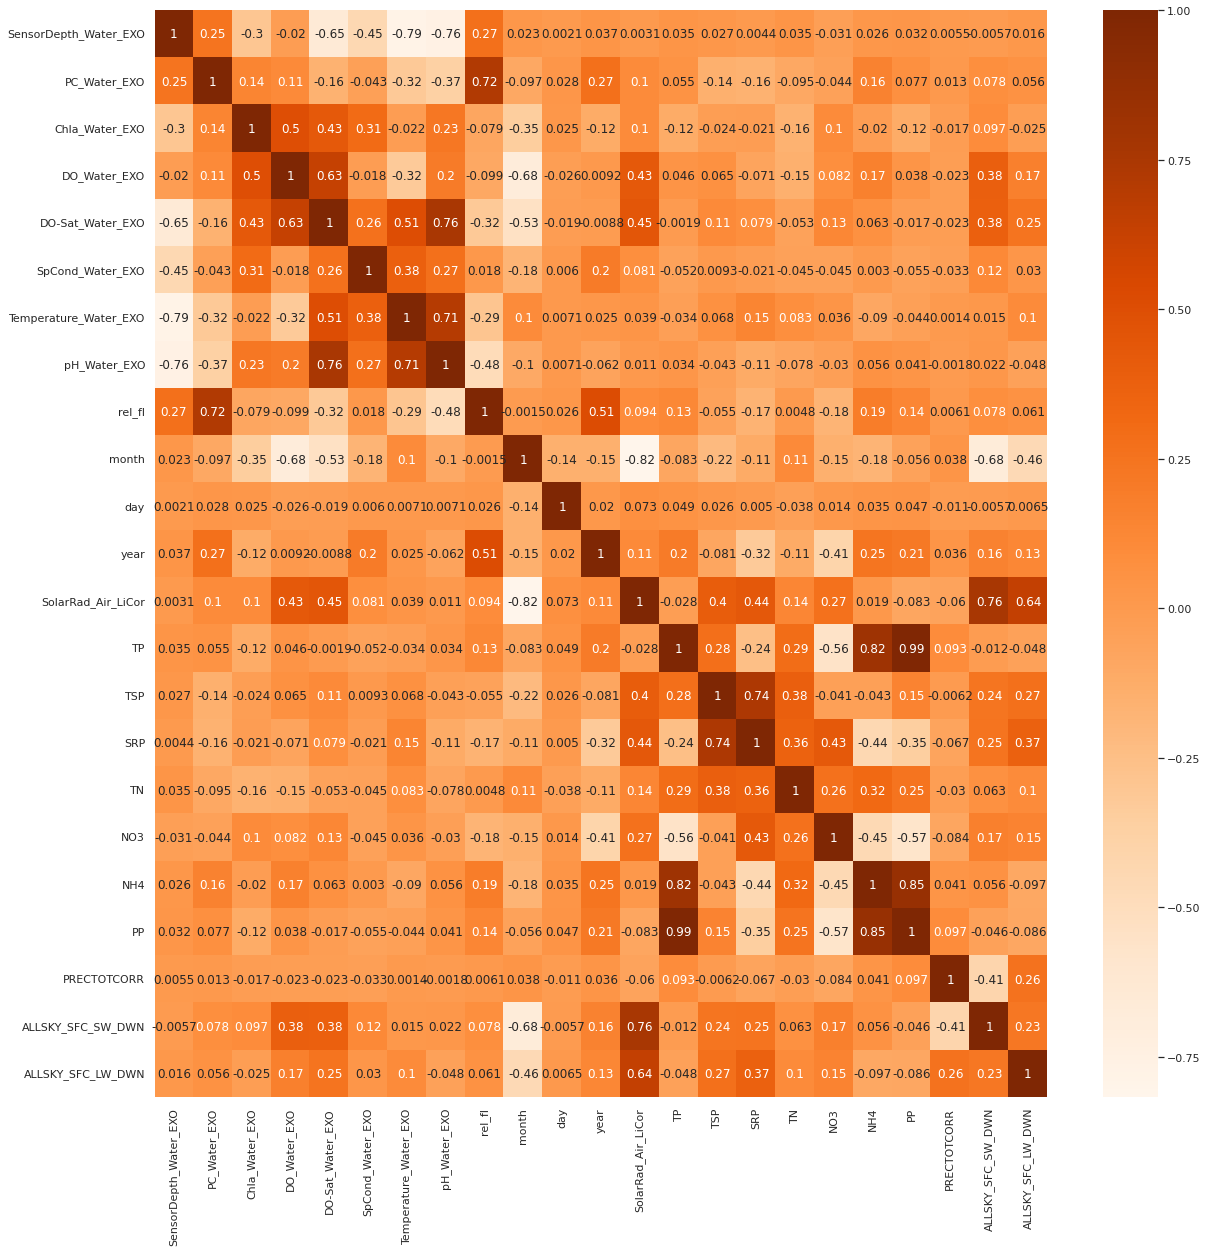

In [16]:
plt.figure(figsize=(20, 20))
sns.heatmap(merged.corr(), cbar=True, annot=True, cmap='Oranges')
plt.show()

In [13]:
merged.head()

,DateTime,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,...,TP,TSP,SRP,TN,NO3,NH4,PP,PRECTOTCORR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_LW_DWN
0,10/1/2017,1.01,0.1556,0.358058,9.17,101.610000,139.810000,20.380000,8.010344,0.880,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,NaN,NaN
1,10/1/2017,1.03,0.1520,0.544445,9.18,101.776667,139.786667,20.386667,8.027139,0.862,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,NaN,NaN
2,10/1/2017,1.05,0.1304,0.843708,9.16,101.230000,139.660000,20.220000,8.019958,0.844,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,NaN,NaN
3,10/1/2017,1.07,0.1592,0.939807,9.16,101.590000,139.780000,20.410000,8.038803,0.826,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,NaN,NaN
4,10/1/2017,1.09,0.1340,0.797623,9.15,101.490000,139.750000,20.420000,8.024188,0.835,...,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741,4.319851,NaN,NaN


In [18]:
merged.to_csv(data_path + '/pc_data_2017_to_2019_2.csv', index=False)